In [28]:
from tqdm.auto import tqdm

from HW2.benchmark_proceeder import BenchmarkStorage
from HW2.error_calculator import SquaredErrorCalculator, AbsErrorCalculator, BoxErrorCalculator
from HW2.optimization import *

from HW2.regression_generator import generate_regression
from HW2.sgd import minibatch_gd, normalised_mini, gd
from HW2.visualization import visualize_regression_point, visualize_line
import numpy as np

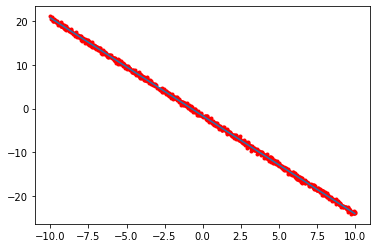

In [29]:
f, points = generate_regression(point_count=1000, scale=3, y_scale=0.25)

visualize_regression_point(f, points)

In [30]:
storage = BenchmarkStorage()

107 gradient calls


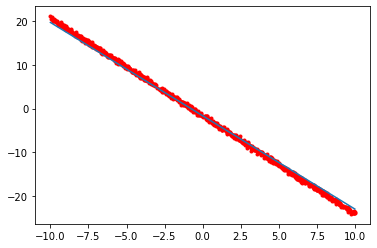

126 gradient calls


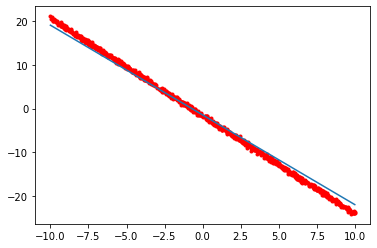

207 gradient calls


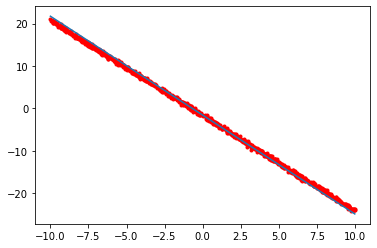

157 gradient calls


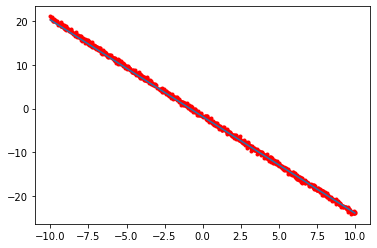

149 gradient calls


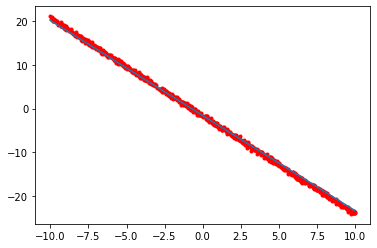

125 gradient calls


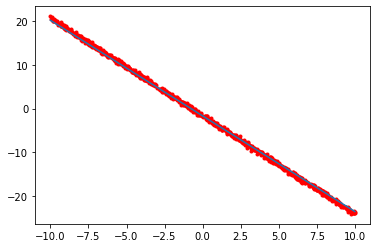

368 gradient calls


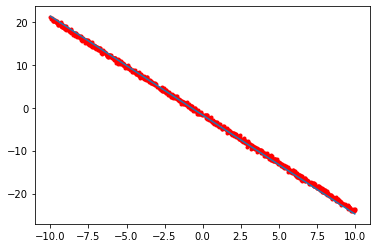

131 gradient calls


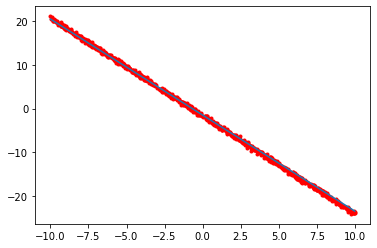

134 gradient calls


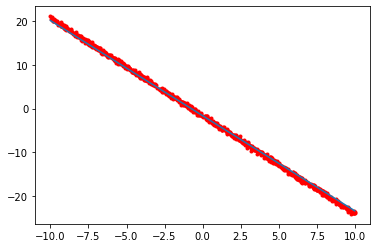

133 gradient calls


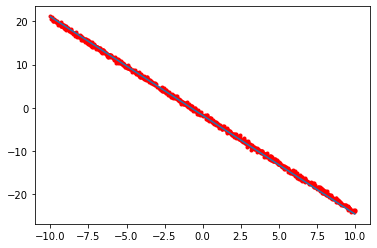

In [31]:
index = storage.add_benchmark_config()
for _ in range(10):
    ab, meta = minibatch_gd(points, eps=5e-2)
    storage.add_benchmark_result(index, meta)
    print('{} gradient calls'.format(meta['gradient_call_count']))
    visualize_line(ab, points)


In [32]:
print(storage.get_benchmark_results(index))

Benchmark results for config <('sgd', False, <HW2.optimization.DefaultOptimization object at 0x0000026102602D90>, <HW2.error_calculator.SquaredErrorCalculator object at 0x0000026102602E20>)>:
	Mean time:0.0228036
	Mean memory:0.0B
	Mean SMAPE value:0.04068199394908563
Mean gradient calls:163.7


123 gradient calls


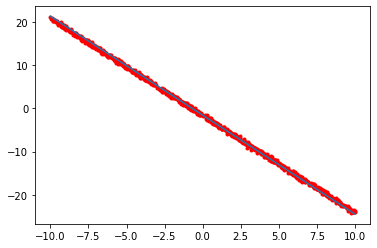

159 gradient calls


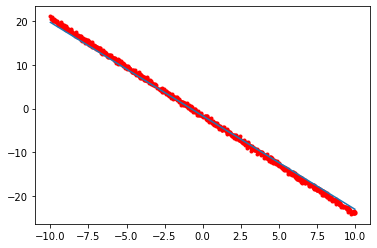

152 gradient calls


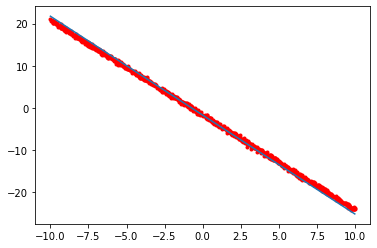

124 gradient calls


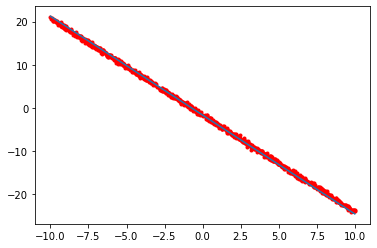

166 gradient calls


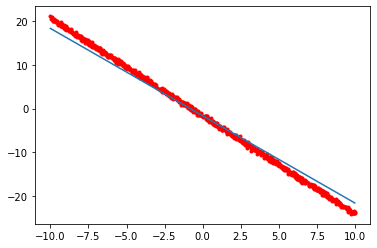

130 gradient calls


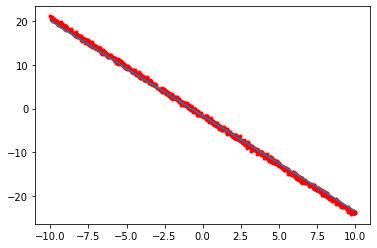

117 gradient calls


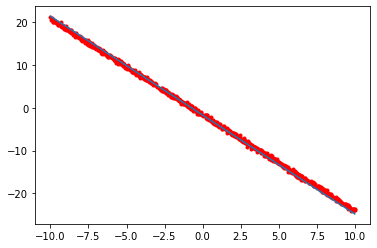

214 gradient calls


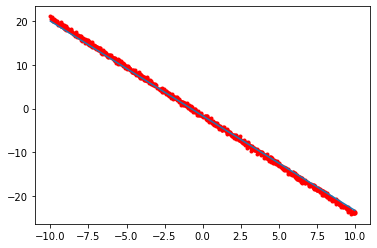

106 gradient calls


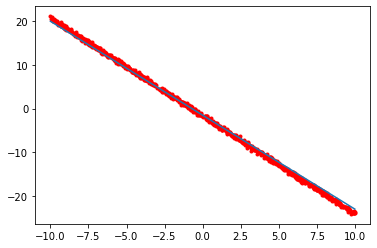

132 gradient calls


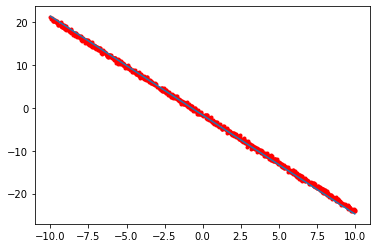

Benchmark results for config <('sgd', False, <HW2.optimization.NesterovOptimization object at 0x0000026146CE0F40>, <HW2.error_calculator.SquaredErrorCalculator object at 0x0000026102602E20>)>:
	Mean time:0.015121
	Mean memory:0.0B
	Mean SMAPE value:0.04253475556980407
Mean gradient calls:142.3


In [33]:
index = storage.add_benchmark_config(optimiser=NesterovOptimization(0.5))
for _ in range(10):
    ab, meta = minibatch_gd(points, eps=5e-2)
    print('{} gradient calls'.format(meta['gradient_call_count']))
    storage.add_benchmark_result(index, meta)
    visualize_line(ab, points)
print(storage.get_benchmark_results(index))

2925 gradient calls


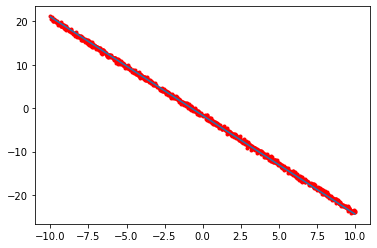

0.03163460028414672
2900 gradient calls


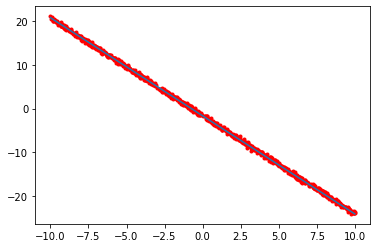

0.03089127154679359
2850 gradient calls


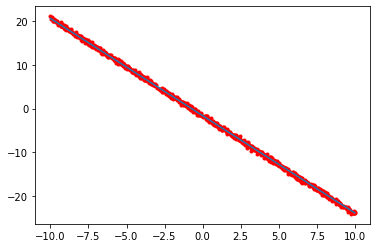

0.030229961808670415
2850 gradient calls


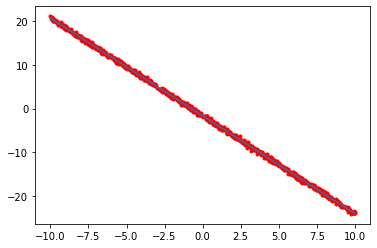

0.030085558688269183
2825 gradient calls


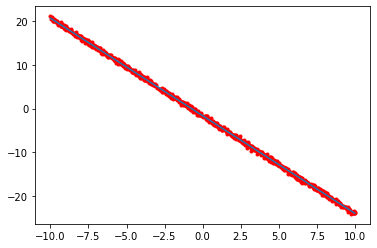

0.030033408596291864
2875 gradient calls


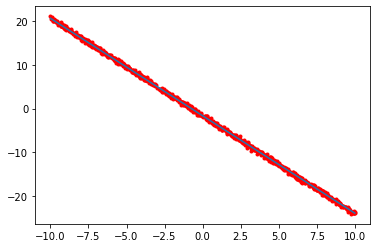

0.03012456166160505
2850 gradient calls


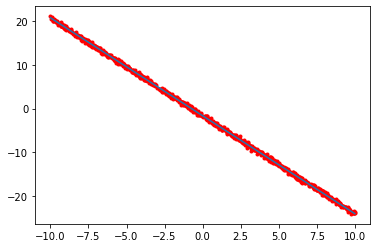

0.030039781965095276
2825 gradient calls


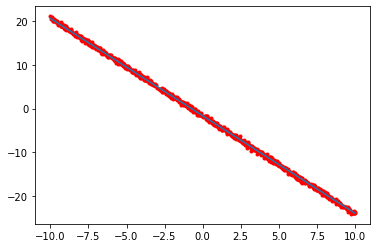

0.030142065656027877
2800 gradient calls


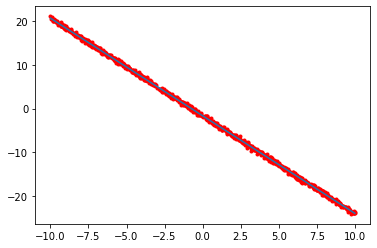

0.030070305484832537
3000 gradient calls


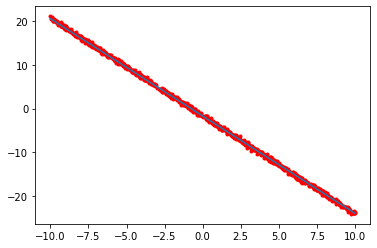

0.03128376867120816
Benchmark results for config <('mini25', False, <HW2.optimization.NesterovOptimization object at 0x0000026146D360D0>, <HW2.error_calculator.SquaredErrorCalculator object at 0x0000026102602E20>)>:
	Mean time:0.05320400000000001
	Mean memory:0.0B
	Mean SMAPE value:0.030453528436294064
Mean gradient calls:2870.0


In [34]:
index = storage.add_benchmark_config(batch_size='mini25', optimiser=NesterovOptimization(0.5))
for _ in range(10):
    ab, meta = minibatch_gd(points, batch_size=25, eps=5e-2)
    storage.add_benchmark_result(index, meta)
    print('{} gradient calls'.format(meta['gradient_call_count']))
    visualize_line(ab, points)
    print(meta['smape'])
print(storage.get_benchmark_results(index))

113000 gradient calls


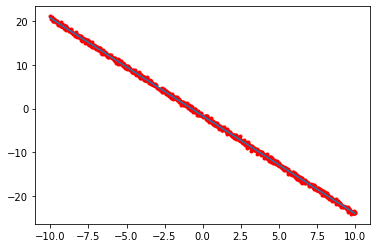

0.03001309316715712
113000 gradient calls


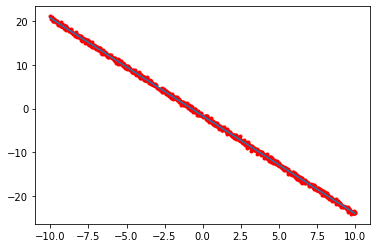

0.03001309316715712
113000 gradient calls


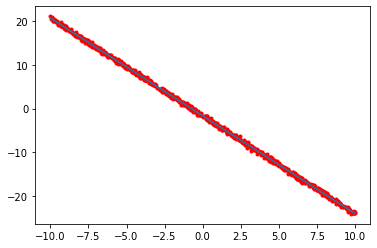

0.03001309316715712
113000 gradient calls


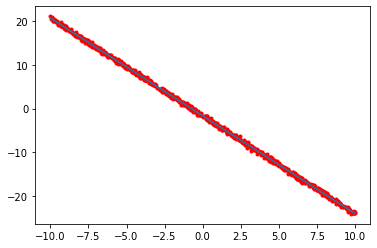

0.03001309316715712
113000 gradient calls


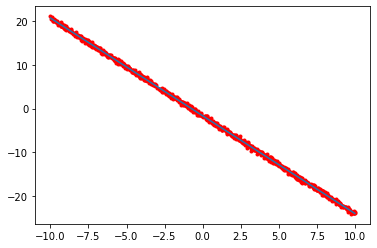

0.03001309316715712
113000 gradient calls


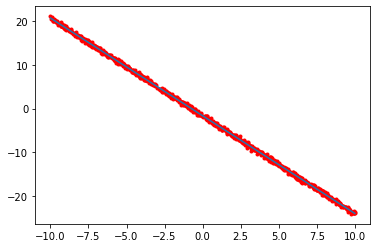

0.030013093167157157
113000 gradient calls


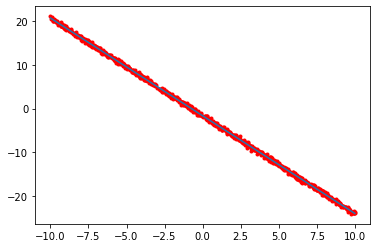

0.03001309316715713
113000 gradient calls


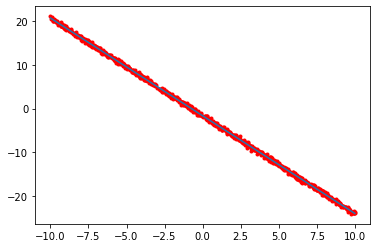

0.03001309316715713
113000 gradient calls


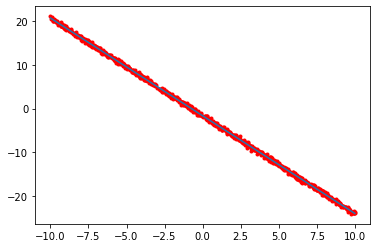

0.030013093167157147
113000 gradient calls


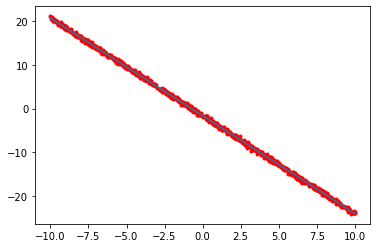

0.030013093167157123
Benchmark results for config <('gd', False, <HW2.optimization.NesterovOptimization object at 0x0000026146F99BB0>, <HW2.error_calculator.SquaredErrorCalculator object at 0x0000026102602E20>)>:
	Mean time:1.5456195999999998
	Mean memory:0.0B
	Mean SMAPE value:0.03001309316715713
Mean gradient calls:113000.0


In [35]:
index = storage.add_benchmark_config(batch_size='gd', optimiser=NesterovOptimization(0.5))
for _ in range(10):
    ab, meta = gd(points, eps=5e-2)
    storage.add_benchmark_result(index, meta)
    print('{} gradient calls'.format(meta['gradient_call_count']))
    visualize_line(ab, points)
    print(meta['smape'])
print(storage.get_benchmark_results(index))

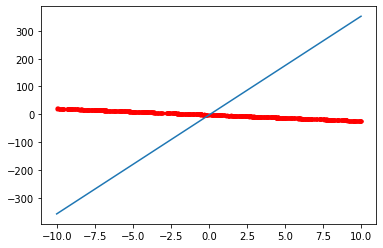

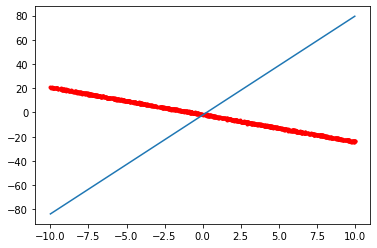

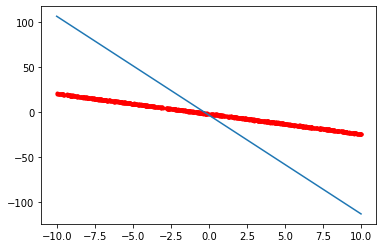

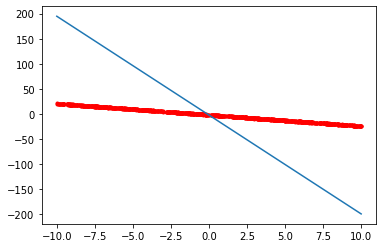

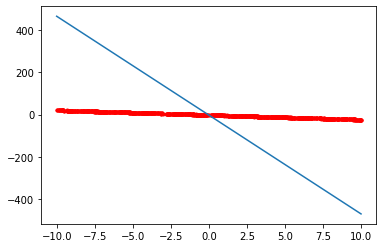

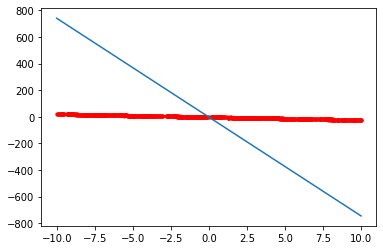

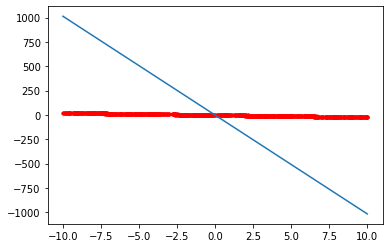

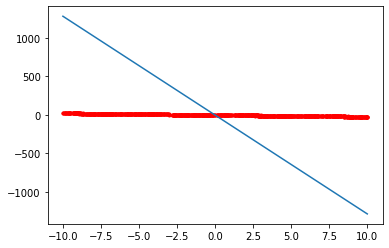

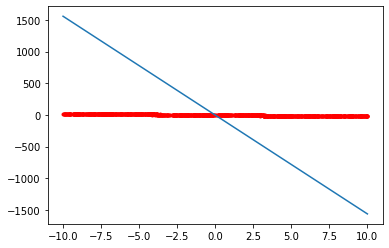

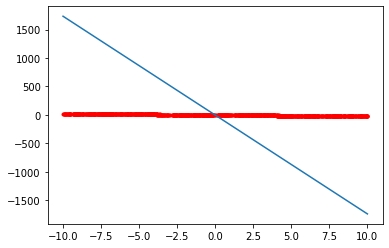

Benchmark results for config <('sgd', True, <HW2.optimization.DefaultOptimization object at 0x0000026102602D90>, <HW2.error_calculator.SquaredErrorCalculator object at 0x0000026102602E20>)>:
	Mean time:1.0603175999999999
	Mean memory:237.57kB
	Mean SMAPE value:0.670234590755794
Mean gradient calls:8678.1


In [36]:
index = storage.add_benchmark_config(batch_size='sgd', normalized=True)
for _ in range(10):
    ab, meta = normalised_mini(points, eps=7e-2)
    storage.add_benchmark_result(index, meta)
    visualize_line(ab, points)
print(storage.get_benchmark_results(index))

In [37]:
errors = [AbsErrorCalculator(), SquaredErrorCalculator(), BoxErrorCalculator()]
optimizators = [DefaultOptimization(), MomentumOptimization(), NesterovOptimization(0.5), AdaGradOptimization(),
                RMSPropOptimization(), AdamOptimization()]

batch_sizes = [1, 10, 25, 100, 250, len(points)]

result = np.array([])
for error in tqdm(errors, "Errors", position=0):
    for optimizator in tqdm(optimizators, "Optimizations", position=1):
        for batch_size in tqdm(batch_sizes, "Batch sizes", position=2):
            for normalising in tqdm([False, True], "Normalising", position=3):

                index = storage.add_benchmark_config(batch_size=str(batch_size), optimiser=optimizator, error=error,
                                                     normalized=normalising)
                for _ in range(20 if batch_size != len(points) else 1):
                    if normalising:
                        ab, meta = normalised_mini(points, batch_size=batch_size, eps=3e-1, error=error,
                                                   optimization=optimizator)
                    else:
                        ab, meta = minibatch_gd(points, batch_size=batch_size, eps=9e-2, error=error,
                                                optimization=optimizator)
                    storage.add_benchmark_result(index, meta)
                result = np.append(result, storage.get_benchmark_results_arrayed(index))
# \w normalising

result

Errors:   0%|          | 0/3 [00:00<?, ?it/s]

Optimizations:   0%|          | 0/6 [00:00<?, ?it/s]

Batch sizes:   0%|          | 0/6 [00:00<?, ?it/s]

Normalising:   0%|          | 0/2 [00:00<?, ?it/s]

C:\Users\maxim\PycharmProjects\Optimization-Methods-IFMO\HW2\benchmark_proceeder.py:52: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array([self.configs[index], np.mean(self.benchmark_results[index]['time']),


Normalising:   0%|          | 0/2 [00:00<?, ?it/s]

Normalising:   0%|          | 0/2 [00:00<?, ?it/s]

Normalising:   0%|          | 0/2 [00:00<?, ?it/s]

Normalising:   0%|          | 0/2 [00:00<?, ?it/s]

Normalising:   0%|          | 0/2 [00:00<?, ?it/s]

Batch sizes:   0%|          | 0/6 [00:00<?, ?it/s]

Normalising:   0%|          | 0/2 [00:00<?, ?it/s]

Normalising:   0%|          | 0/2 [00:00<?, ?it/s]

Normalising:   0%|          | 0/2 [00:00<?, ?it/s]

Normalising:   0%|          | 0/2 [00:00<?, ?it/s]

Normalising:   0%|          | 0/2 [00:00<?, ?it/s]

Normalising:   0%|          | 0/2 [00:00<?, ?it/s]

Batch sizes:   0%|          | 0/6 [00:00<?, ?it/s]

Normalising:   0%|          | 0/2 [00:00<?, ?it/s]

Normalising:   0%|          | 0/2 [00:00<?, ?it/s]

Normalising:   0%|          | 0/2 [00:00<?, ?it/s]

Normalising:   0%|          | 0/2 [00:00<?, ?it/s]

Normalising:   0%|          | 0/2 [00:00<?, ?it/s]

Normalising:   0%|          | 0/2 [00:00<?, ?it/s]

Batch sizes:   0%|          | 0/6 [00:00<?, ?it/s]

Normalising:   0%|          | 0/2 [00:00<?, ?it/s]

Normalising:   0%|          | 0/2 [00:00<?, ?it/s]

Normalising:   0%|          | 0/2 [00:00<?, ?it/s]

Normalising:   0%|          | 0/2 [00:00<?, ?it/s]

Normalising:   0%|          | 0/2 [00:00<?, ?it/s]

Normalising:   0%|          | 0/2 [00:00<?, ?it/s]

Batch sizes:   0%|          | 0/6 [00:00<?, ?it/s]

Normalising:   0%|          | 0/2 [00:00<?, ?it/s]

Normalising:   0%|          | 0/2 [00:00<?, ?it/s]

Normalising:   0%|          | 0/2 [00:00<?, ?it/s]

Normalising:   0%|          | 0/2 [00:00<?, ?it/s]

Normalising:   0%|          | 0/2 [00:00<?, ?it/s]

Normalising:   0%|          | 0/2 [00:00<?, ?it/s]

Batch sizes:   0%|          | 0/6 [00:00<?, ?it/s]

Normalising:   0%|          | 0/2 [00:00<?, ?it/s]

Normalising:   0%|          | 0/2 [00:00<?, ?it/s]

Normalising:   0%|          | 0/2 [00:00<?, ?it/s]

Normalising:   0%|          | 0/2 [00:00<?, ?it/s]

Normalising:   0%|          | 0/2 [00:00<?, ?it/s]

Normalising:   0%|          | 0/2 [00:00<?, ?it/s]

Optimizations:   0%|          | 0/6 [00:00<?, ?it/s]

Batch sizes:   0%|          | 0/6 [00:00<?, ?it/s]

Normalising:   0%|          | 0/2 [00:00<?, ?it/s]

Normalising:   0%|          | 0/2 [00:00<?, ?it/s]

Normalising:   0%|          | 0/2 [00:00<?, ?it/s]

Normalising:   0%|          | 0/2 [00:00<?, ?it/s]

Normalising:   0%|          | 0/2 [00:00<?, ?it/s]

Normalising:   0%|          | 0/2 [00:00<?, ?it/s]

Batch sizes:   0%|          | 0/6 [00:00<?, ?it/s]

Normalising:   0%|          | 0/2 [00:00<?, ?it/s]

Normalising:   0%|          | 0/2 [00:00<?, ?it/s]

Normalising:   0%|          | 0/2 [00:00<?, ?it/s]

Normalising:   0%|          | 0/2 [00:00<?, ?it/s]

Normalising:   0%|          | 0/2 [00:00<?, ?it/s]

Normalising:   0%|          | 0/2 [00:00<?, ?it/s]

Batch sizes:   0%|          | 0/6 [00:00<?, ?it/s]

Normalising:   0%|          | 0/2 [00:00<?, ?it/s]

Normalising:   0%|          | 0/2 [00:00<?, ?it/s]

Normalising:   0%|          | 0/2 [00:00<?, ?it/s]

Normalising:   0%|          | 0/2 [00:00<?, ?it/s]

Normalising:   0%|          | 0/2 [00:00<?, ?it/s]

Normalising:   0%|          | 0/2 [00:00<?, ?it/s]

Batch sizes:   0%|          | 0/6 [00:00<?, ?it/s]

Normalising:   0%|          | 0/2 [00:00<?, ?it/s]

Normalising:   0%|          | 0/2 [00:00<?, ?it/s]

Normalising:   0%|          | 0/2 [00:00<?, ?it/s]

Normalising:   0%|          | 0/2 [00:00<?, ?it/s]

Normalising:   0%|          | 0/2 [00:00<?, ?it/s]

Normalising:   0%|          | 0/2 [00:00<?, ?it/s]

Batch sizes:   0%|          | 0/6 [00:00<?, ?it/s]

Normalising:   0%|          | 0/2 [00:00<?, ?it/s]

Normalising:   0%|          | 0/2 [00:00<?, ?it/s]

Normalising:   0%|          | 0/2 [00:00<?, ?it/s]

Normalising:   0%|          | 0/2 [00:00<?, ?it/s]

Normalising:   0%|          | 0/2 [00:00<?, ?it/s]

Normalising:   0%|          | 0/2 [00:00<?, ?it/s]

Batch sizes:   0%|          | 0/6 [00:00<?, ?it/s]

Normalising:   0%|          | 0/2 [00:00<?, ?it/s]

Normalising:   0%|          | 0/2 [00:00<?, ?it/s]

Normalising:   0%|          | 0/2 [00:00<?, ?it/s]

Normalising:   0%|          | 0/2 [00:00<?, ?it/s]

Normalising:   0%|          | 0/2 [00:00<?, ?it/s]

Normalising:   0%|          | 0/2 [00:00<?, ?it/s]

Optimizations:   0%|          | 0/6 [00:00<?, ?it/s]

Batch sizes:   0%|          | 0/6 [00:00<?, ?it/s]

Normalising:   0%|          | 0/2 [00:00<?, ?it/s]

Normalising:   0%|          | 0/2 [00:00<?, ?it/s]

Normalising:   0%|          | 0/2 [00:00<?, ?it/s]

Normalising:   0%|          | 0/2 [00:00<?, ?it/s]

Normalising:   0%|          | 0/2 [00:00<?, ?it/s]

Normalising:   0%|          | 0/2 [00:00<?, ?it/s]

Batch sizes:   0%|          | 0/6 [00:00<?, ?it/s]

Normalising:   0%|          | 0/2 [00:00<?, ?it/s]

Normalising:   0%|          | 0/2 [00:00<?, ?it/s]

Normalising:   0%|          | 0/2 [00:00<?, ?it/s]

Normalising:   0%|          | 0/2 [00:00<?, ?it/s]

Normalising:   0%|          | 0/2 [00:00<?, ?it/s]

Normalising:   0%|          | 0/2 [00:00<?, ?it/s]

Batch sizes:   0%|          | 0/6 [00:00<?, ?it/s]

Normalising:   0%|          | 0/2 [00:00<?, ?it/s]

Normalising:   0%|          | 0/2 [00:00<?, ?it/s]

Normalising:   0%|          | 0/2 [00:00<?, ?it/s]

Normalising:   0%|          | 0/2 [00:00<?, ?it/s]

Normalising:   0%|          | 0/2 [00:00<?, ?it/s]

Normalising:   0%|          | 0/2 [00:00<?, ?it/s]

Batch sizes:   0%|          | 0/6 [00:00<?, ?it/s]

Normalising:   0%|          | 0/2 [00:00<?, ?it/s]

Normalising:   0%|          | 0/2 [00:00<?, ?it/s]

Normalising:   0%|          | 0/2 [00:00<?, ?it/s]

Normalising:   0%|          | 0/2 [00:00<?, ?it/s]

Normalising:   0%|          | 0/2 [00:00<?, ?it/s]

Normalising:   0%|          | 0/2 [00:00<?, ?it/s]

Batch sizes:   0%|          | 0/6 [00:00<?, ?it/s]

Normalising:   0%|          | 0/2 [00:00<?, ?it/s]

Normalising:   0%|          | 0/2 [00:00<?, ?it/s]

Normalising:   0%|          | 0/2 [00:00<?, ?it/s]

Normalising:   0%|          | 0/2 [00:00<?, ?it/s]

Normalising:   0%|          | 0/2 [00:00<?, ?it/s]

Normalising:   0%|          | 0/2 [00:00<?, ?it/s]

Batch sizes:   0%|          | 0/6 [00:00<?, ?it/s]

Normalising:   0%|          | 0/2 [00:00<?, ?it/s]

Normalising:   0%|          | 0/2 [00:00<?, ?it/s]

Normalising:   0%|          | 0/2 [00:00<?, ?it/s]

Normalising:   0%|          | 0/2 [00:00<?, ?it/s]

Normalising:   0%|          | 0/2 [00:00<?, ?it/s]

Normalising:   0%|          | 0/2 [00:00<?, ?it/s]

array([('1', False, <HW2.optimization.DefaultOptimization object at 0x0000026146BFECD0>, <HW2.error_calculator.AbsErrorCalculator object at 0x0000026146BFED00>),
       0.014996549999999997, '0.0B', ..., '0.0B', 0.0300532303393544,
       50000.0], dtype=object)

In [45]:
result = result.reshape((216, 5))
result

array([[('1', False, <HW2.optimization.DefaultOptimization object at 0x0000026146BFECD0>, <HW2.error_calculator.AbsErrorCalculator object at 0x0000026146BFED00>),
        0.014996549999999997, '0.0B', 0.03832606694797366, 117.0],
       [('1', True, <HW2.optimization.DefaultOptimization object at 0x0000026146BFECD0>, <HW2.error_calculator.AbsErrorCalculator object at 0x0000026146BFED00>),
        0.0054019, '0.0B', 0.4316074791475325, 52.15],
       [('10', False, <HW2.optimization.DefaultOptimization object at 0x0000026146BFECD0>, <HW2.error_calculator.AbsErrorCalculator object at 0x0000026146BFED00>),
        0.029445350000000002, '0.0B', 0.03169137257857476, 1076.0],
       ...,
       [('250', True, <HW2.optimization.AdamOptimization object at 0x0000026146BFEFA0>, <HW2.error_calculator.BoxErrorCalculator object at 0x0000026146BFED60>),
        0.17109630000000003, '0.0B', 0.030070106529440477, 12500.0],
       [('1000', False, <HW2.optimization.AdamOptimization object at 0x00000261

In [46]:
import pandas as pd

## convert your array into a dataframe
df = pd.DataFrame(result)

## save to xlsx file

filepath = 'result.xlsx'

df.to_excel(filepath, index=False)